In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 20})

## Summary

* no missing data
* different satelites have different number of observations (max is 6320, min is 94)
* there are strong systematic nonlinear(!) discrepancies between simaluted and real values for coordinates and for speeds. The shape of deviation looks like lissajou figures (but may have nothing to do with them) 
* for coordinates, the largest mismatch is at large values

In [17]:
data = pd.read_csv('train.csv', index_col= 'id')
data.head(3)

,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
id,,,,,,,,,,,,,,
0,2014-01-01T00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,2014-01-01T00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2014-01-01T01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649912 entries, 0 to 1234093
Data columns (total 14 columns):
epoch     649912 non-null object
sat_id    649912 non-null int64
x         649912 non-null float64
y         649912 non-null float64
z         649912 non-null float64
Vx        649912 non-null float64
Vy        649912 non-null float64
Vz        649912 non-null float64
x_sim     649912 non-null float64
y_sim     649912 non-null float64
z_sim     649912 non-null float64
Vx_sim    649912 non-null float64
Vy_sim    649912 non-null float64
Vz_sim    649912 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 74.4+ MB


In [6]:
# checking missing values
data.isna().sum(axis = 'rows')

epoch     0
sat_id    0
x         0
y         0
z         0
Vx        0
Vy        0
Vz        0
x_sim     0
y_sim     0
z_sim     0
Vx_sim    0
Vy_sim    0
Vz_sim    0
dtype: int64

In [18]:
sat_obs = data.sat_id.value_counts()
print('maxinum number of observations: {}'.format(sta_obs.max()))
print('minimum number of observations: {}'.format(sta_obs.min()))

maxinum number of observations: 6320
minimum number of observations: 94


Text(0, 0.5, 'x')

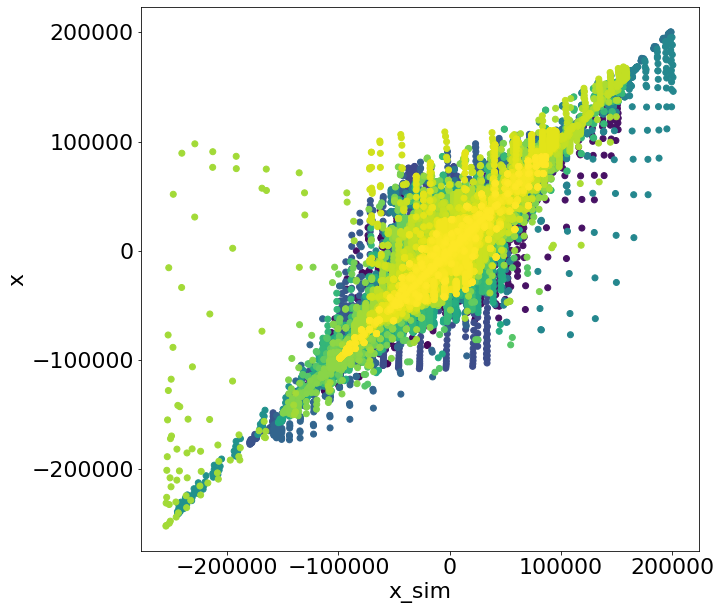

In [61]:
# see how different the simulated coordinates from predicted
plt.figure(figsize=(10,10))
plt.scatter(data.x_sim,data.x,c=data.sat_id)
plt.xlabel("x_sim")
plt.ylabel("x")

Text(0, 0.5, 'Vx')

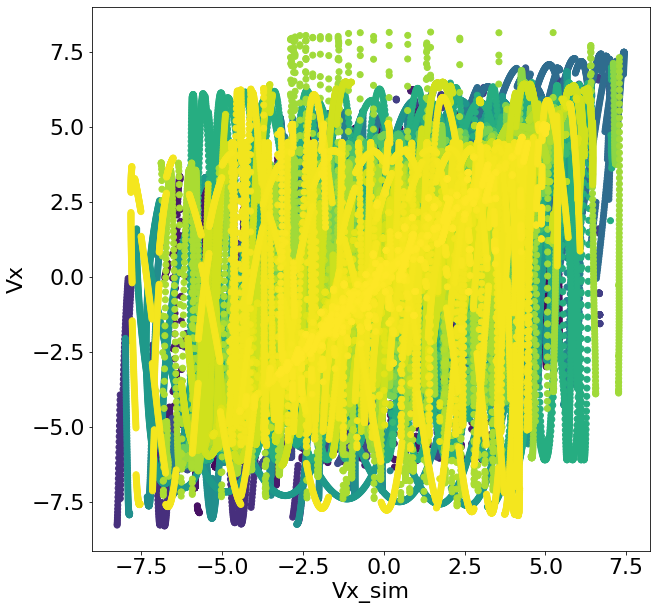

In [62]:
# see how different the simulated coordinates from predicted
data_sat = data[data.sat_id == 0]
plt.figure(figsize=(10,10))
plt.scatter(data.Vx_sim,data.Vx,c=data.sat_id)
plt.xlabel("Vx_sim")
plt.ylabel("Vx")

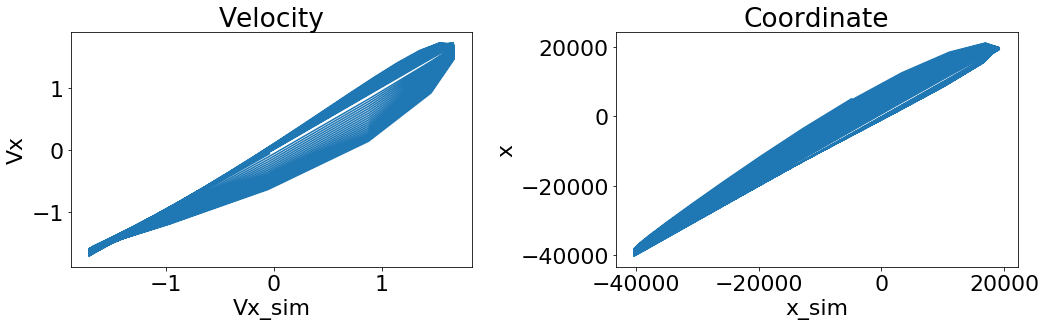

In [86]:
# let us look at a single satelite
data_sat = data[data.sat_id == 300]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), linewidth = 0.1)
ax1.plot(data_sat.Vx_sim,data_sat.Vx)
ax1.set_title("Velocity")
ax1.set_xlabel("Vx_sim")
ax1.set_ylabel("Vx")
ax2.plot(data_sat.x_sim,data_sat.x)
ax2.set_title("Coordinate")
ax2.set_xlabel("x_sim")
ax2.set_ylabel("x")
plt.tight_layout()
